In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("winequality-red.csv") 
# Добавление нового атрибута
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']

# Обработка выбросов (IQR) - пример для одного столбца, повторите для других
def treat_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.clip(df[col], lower_bound, upper_bound)

for col in ['volatile acidity', 'residual sugar', 'total_acidity']:
  treat_outliers(df, col)

# Удаление дубликатов (если есть)
df.drop_duplicates(inplace=True)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,8.100
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,8.680
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,8.560
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,11.480
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,8.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,7.420
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,6.800
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6.450
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,6.545


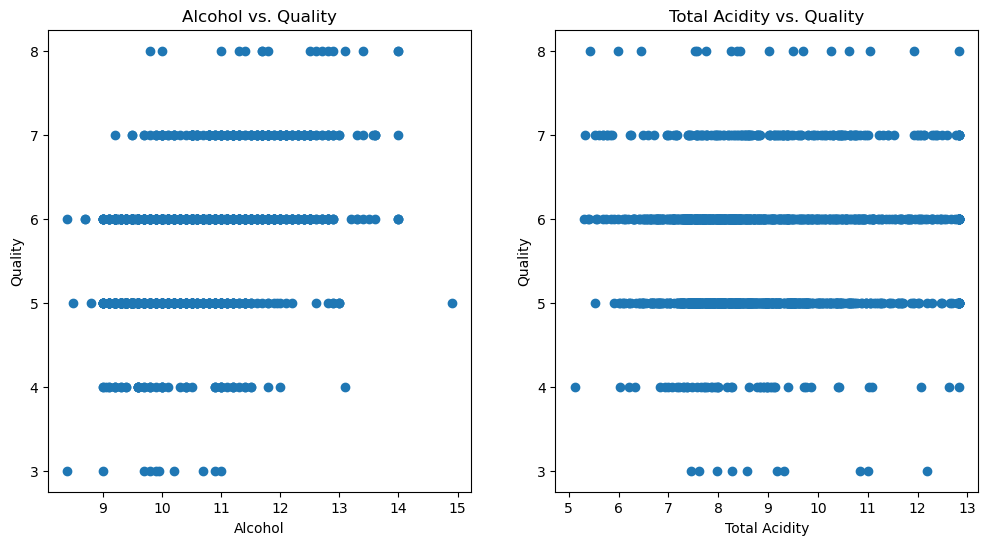

In [19]:
# Пример графиков рассеяния
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs. Quality')

plt.subplot(1, 2, 2)
plt.scatter(df['total_acidity'], df['quality'])
plt.xlabel('Total Acidity')
plt.ylabel('Quality')
plt.title('Total Acidity vs. Quality')
plt.show()


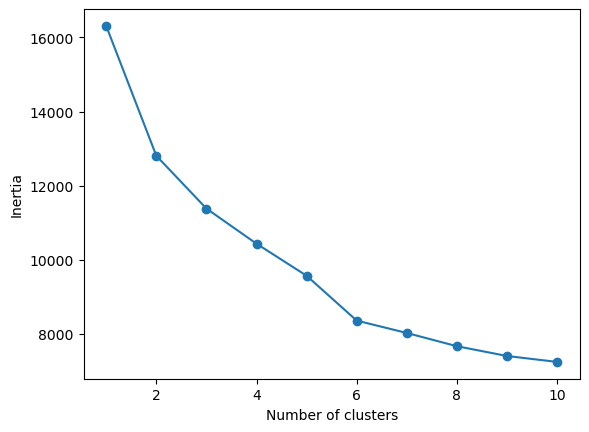

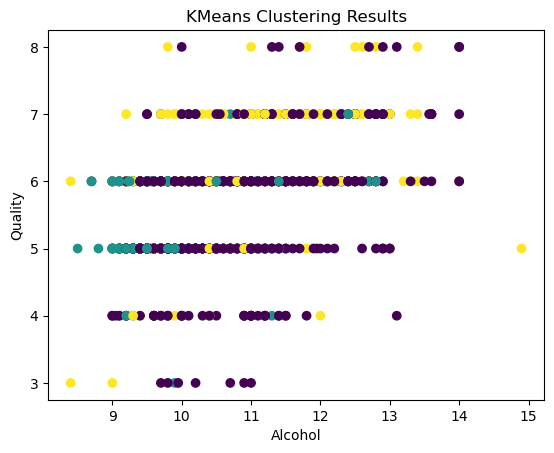

In [21]:
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('quality', axis=1))

# Определение оптимального k (метод локтя)
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# KMeans с выбранным k (например, k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Визуализация результатов
plt.scatter(df['alcohol'], df['quality'], c=df['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('KMeans Clustering Results')
plt.show()
